# Métricas clasificación

Vamos a entrenar un modelo simple para clasificar sobre Iris dataset y calcular las métricas utilizando sklearn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Modelo simple de clasificación

In [ ]:
X = iris.drop("species", axis=1)
y = iris.species

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [ ]:
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Porcentaje de aceirtos sobre el set de entrenamiento:', train_acc)
print('Porcentaje de aceirtos sobre el set de evaluación:',test_acc)

Porcentaje de aceirtos sobre el set de entrenamiento: 0.9583333333333334
Porcentaje de aceirtos sobre el set de evaluación: 0.9666666666666667


## Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

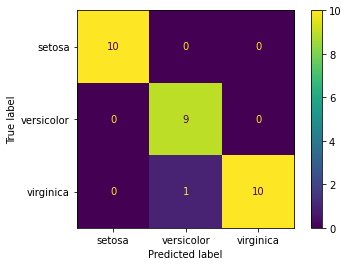

In [ ]:
plot_confusion_matrix(knn, X_test, y_test)

## Precision, recall y f1score

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Support: Support is the number of actual occurrences of the class in the specified dataset.

macro and wighted avg: https://datascience.stackexchange.com/questions/65839/macro-average-and-weighted-average-meaning-in-classification-report

# Práctica

Vamos a trabajar con un dataset que contiene información sobre jugadores de basket. El objetivo es predecir si el jugador va a durar al menos 5 años en la liga.

La siguiente linea les va a descargar el csv de un link de drive para que puedan importarlo directamente:

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jeY3fh6ifqk0ESm8IKvI1nyJoKzTAzMX' -O nba.csv

--2021-09-16 16:21:15--  https://docs.google.com/uc?export=download&id=1jeY3fh6ifqk0ESm8IKvI1nyJoKzTAzMX
Resolving docs.google.com (docs.google.com)... 173.194.215.100, 173.194.215.101, 173.194.215.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.215.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2ibliot3u5tdhr6p59j1ngminb5qi8i0/1631809275000/14260194928165318342/*/1jeY3fh6ifqk0ESm8IKvI1nyJoKzTAzMX?e=download [following]
--2021-09-16 16:21:15--  https://doc-00-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2ibliot3u5tdhr6p59j1ngminb5qi8i0/1631809275000/14260194928165318342/*/1jeY3fh6ifqk0ESm8IKvI1nyJoKzTAzMX?e=download
Resolving doc-00-74-docs.googleusercontent.com (doc-00-74-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to doc-00-74-docs.googleusercontent.com (doc-00

## Análisis exploratiorio de los datos (EDA)

Comencemos explorando el dataset

Leemos el csv

In [ ]:
df = pd.read_csv("nba.csv")

In [ ]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Diccionario de datos:

- Name: name
- GP: games played = partidos jugados
- MIN: minutes played = minutos jugados
- PTS: points per game = puntos por partido
- FGM: Field goals Made = Goles hechos
- FGA: Field goal attempts = Goles intentados
- FG% Field goal percent = Porcentaje de goles hechos
- 3P Made: 3 point made = Triples hechos
- 3PA: 3 point attempts = Triples intentados
- 3P%: 3 point attempts = Porcentaje de triples hechos
- FTM: Free throw made = Tiros libres hechos
- FTA: Free throw attempts = Tiros libres intentados
- FT%: Free throw percent = Porcentaje de tiros libres
- OREB: Offensive rebounds = Rebotes ofensivos
- DREB: Defensive rebounds = Rebotes defensivos
- REB: Rebounds = Rebotes
- AST: Assists = Asistencias
- STL: Steals = Robos
- BLK: Blocks = Bloqueos
- TOV: Turnovers = Pierde la posesión de la pelota
- TARGET_5Yrs: Outcome: 1 if career length >= 5 yrs, 0 if < 5

¿ Cuántas filas y columnas tiene el dataset ?

In [ ]:
#COMPLETAR

¿ Cúantos jugadores (nombres distintos) hay ?

In [ ]:
#COMPLETAR

### Nulos

Hay nulos?

In [ ]:
#COMPLETAR

Imprimir las filas del dataframe en donde la columna 3P% tiene nulos (usando una máscara)

In [ ]:
#COMPLETAR

Vemos que los nulos están justo donde 3PA y 3PMade son = 0. Por lo tanto, podemos completar los nulos de 3P% con 0s.

Completar los nulos de 3p%:

In [ ]:
#COMPLETAR

### Medidas de resumen

Imprimir un resumen de los datos (valores minimos, máximos, percentiles, media, etc)

In [ ]:
#COMPLETAR

### Distribución de variables

¿ Cómo se distribuyen las variables ?

Plotear la distribución de todas las variables excepto Name y TARGET_5yrs.

El plot tiene que ser armado con subplots de 2 columnas. En la primera vamos a hacer un distplot y en la segunda un boxplot.

En la clase 8 vimos esto. Pueden consultar el notebook de esa clase.

Tener en cuenta:
- Poner un titulo a cada subplot (cada ax)
- En el subplot, setear un figsize de (20,60) como mínimo para poder visualizar bien todo
- Si los subplots quedan muy juntos, pueden utilizar como indica [este link](https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/) el siguiente bloque de código al final de todo:


```
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()
```

In [ ]:
#COMPLETAR

### Distribución del target

¿ Cómo se distribuye el target ?

Plotear la distribución de el target con el gráfico que les parezca más adecuado.

In [ ]:
#COMPLETAR

¿ Cuántos 1s y 0s hay en el target ?

In [ ]:
#COMPLETAR

¿ En porcentajes ?

In [ ]:
#COMPLETAR

### Outliers

¿ Hay outliers ?

En los boxplots se puede ver que hay outliers en la mayor parte de las variables. Sin embargo, para esta primer iteración del modelo, no haremos nada con ellos.

### Correlación

¿ Hay correlación entre las variables ?

Tip: En el notebook de la clase 9 tenian un ejemplo para plotear un heatmap que solo muestra la mitad que nos interesa, con un buen tamaño y anotaciones.

In [ ]:
#COMPLETAR

El heatmap queda muy grande por la cantidad de variables que hay. 

Ahora, queremos analizar la correlación de las variables con el target. ¿Cómo podemos hacer esto?

Plotear un heatmap que solo muestre la correlación entre las variables y el target (va a tener una única columna).

Para esto, pueden guiarse con esta pregunta de stackoverflow: https://stackoverflow.com/questions/47585775/seaborn-heatmap-with-single-column

In [ ]:
#COMPLETAR

### Train test split

¿ Qué variables tomarían para entrenar un modelo ?

En principio pueden ser todas, pueden descartar variables que estén muy correlacionadas entre si, o seleccionar algunas con el criterio que les parezca. Luego se puede iterar.

In [ ]:
# COMPLETAR

Definir baseline

In [ ]:
# Completar

Train - test split

Hacer un train - test split.

Nos vamos a quedar con un 20% de los datos para evaluar el modelo.

Primero que nada, recuerden dividir el df original en X e y.

¿ Qué van a hacer con la variable Name ?

In [ ]:
#COMPLETAR

### Decision tree

Vamos a arrancar entrenando un decision tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Vamos a definir un listado de max_depths, entrenar el arbol y generar predicciones con cada uno de estos valores y decidir cuál es el mejor valor según las métricas obtenidas.

La métrica que vamos a medir es F1Score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

Primero, importar decision tree classifier y definir el listado de max depths:

In [ ]:
#COMPLETAR

Ahora, por cada valor de max depth, debemos entrenar el arbol, generar predicciones de train, test y almacenarlas en 2 listas.

Para esto, primero creemos las 2 listas vacias en las que vamos a ir almacenando las métricas obtenidas.

In [ ]:
#COMPLETAR

Ahora, hacer el entrenamiento y predicciones para cada valor de max_depth. Calcular métrica y guardarla en la lista correspondiente.

Recuerden importar F1score de sklearn

In [ ]:
#COMPLETAR

In [ ]:
#COMPLETAR

Imprimir las listas de scores:

In [ ]:
#COMPLETAR

In [ ]:
#COMPLETAR

Graficar un plot que contenga en el eje de las x max_depts y en el eje de las y las correspondientes métricas de train y test (2 lineas)

In [ ]:
#COMPLETAR

¿ Conclusiones ?

Basándose en el gráfico, seleccionar el max_depth optimo, entrenar el arbol y plotear la matriz de confusión:

In [ ]:
#COMPLETAR

Imprimir el classification report:

In [ ]:
#COMPLETAR

¿ Cómo mejorarían el modelo ?